Jordan Smith

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 3a: Linear Regression

## Task 1. Mystery Data 1

### 1a) Import the data

1. Import data 'data/mystery_data_1.csv' (using your data class or [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html))
2. Print first 10 lines rows of data.

#### 1b) Using the following links and MatPlotLib documentation to view the data:
- [MatPlotLib](https://matplotlib.org/)
- [MatPlotLib hist](https://matplotlib.org/gallery/statistics/hist.html)
1. Create a figure with 3 subplots
    1. One scatterplot with column X on the x-axis and column Y on the y-axis.
    1. Two historgrams one for the X data and the other for the Y data.
    2. Create the histograms with 10 bins.
    3. Include a title for each subplot.

First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]

-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------



/var/folders/__/3rdwnrd13r538fys8h8fk6fr0000gn/T/ipykernel_63796/1107634377.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
/var/folders/__/3rdwnrd13r538fys8h8fk6fr0000gn/T/ipykernel_63796/1107634377.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


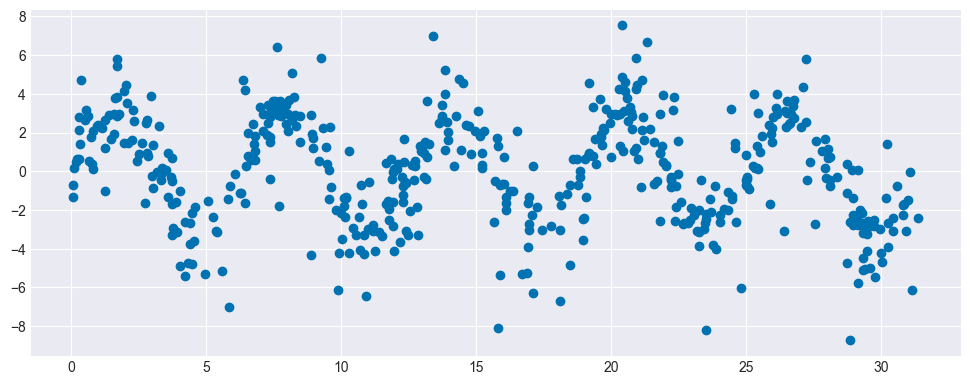

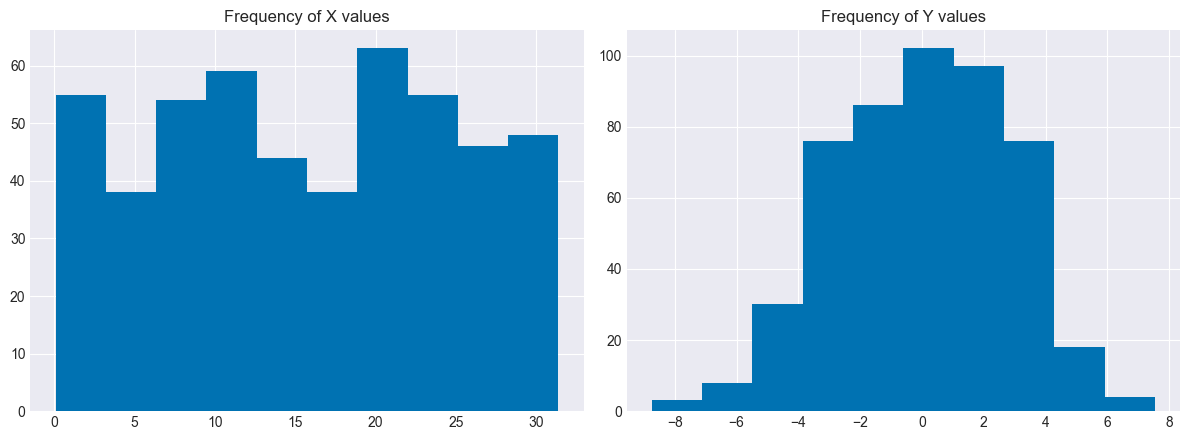

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams["figure.figsize"] = [12,4.5]

lines = np.genfromtxt("data/mystery_data_1.csv", skip_header=2, delimiter=",")
print("First 10 rows:")
print(lines[:10,:])

plt.scatter(lines[:,0],lines[:,1])

fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)
axs[0].set_title("Frequency of X values")
axs[0].hist(lines[:,0],bins=10)
axs[1].set_title("Frequency of Y values")
axs[1].hist(lines[:,1],bins=10)

print('''
-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------
''')

## Task 2. Analyze Mystery Data 1

### 2a) Use scipy to calculate the linear regression for Mystery Data 1 

1. Print first 10 lines rows of data.
2. Calculate the linear regression [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)
    1. The x column is the left hand side array and the y column is the right hand side array.
    2. This includes adding homogeneous coordinates (for the intercept) to the A matrix. 
    3. Useful methods: [hstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html), [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) and [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)
3. Print the least-squares solution and residues
4. Using the residual, calculate and print the $R^2$ value
    1. $R^2 = 1 - \frac{residues}{smd}$
    2. The square mean deviation: $smd = \sum (y - \frac{\sum y}{n} )^2$

In [3]:
import scipy.linalg

print(print(lines[:10,:]))
x_comp = lines[:,0].reshape((lines.shape[0],1))
x = np.hstack((np.ones((x_comp.shape[0],1)),x_comp))
y = lines[:,1]
lstsq = scipy.linalg.lstsq(x,y)
print("c: ", lstsq[0], "\n")
print("residues: ", lstsq[1], "\n")
smd = np.sum((y-(np.sum(y)/lines.shape[0]))**2)
r2 = 1 - (lstsq[1]/smd)
print("r2: ", r2)

print('''
-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

residues: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------
''')

[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
None
c:  [ 0.92884793 -0.05650709] 

residues:  3722.8001542015754 

r2:  0.033824411486558126

-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

residues: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------



### 2b) Visualize linear regression results with matplotlib

1. Plot a scatterplot of the mystery data X on the x axis and Y on the y axis
2. Plot a line representing the linear regression
    1. For line_x, use [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to create 100 points from the min x value to the max x value
    2. For line_y, multiply line_x by the slope and add the intercept
3. Include a title (with $R^2$ value), legend, x label and y label

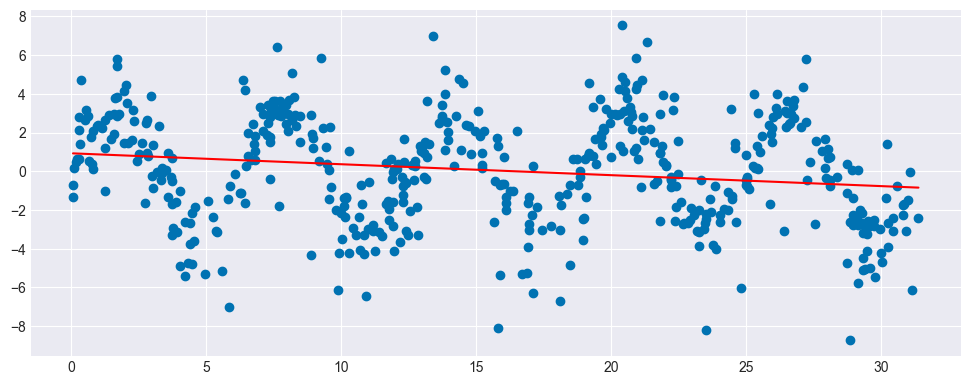

In [4]:
plt.scatter(lines[:,0],lines[:,1])
slope = lstsq[0][1]
y_int = lstsq[0][0]

x = np.linspace(np.min(x),np.max(x),100)
y = (x * slope) + y_int

plt.plot(np.linspace(np.min(x),np.max(x),100),y,color="red")

### 2c)  Interpret the results of the linear regression of the dataset 

Interpret the results based on your plot and $R^2$ value. Is the linear regression model a good model for the data? Why?

My R2 value is very low, which indicates that my line is not a good fit. This can be seen graphically above, as my line misses much of the complexity of the graph. The reason for this is that a line does not have enough degrees to represent the turns in the pattern of the data.